# Apache Spark Koalas

Este notebook contiene las funciones principales de Koalas, obtenidas de la documentación oficial de https://koalas.readthedocs.io/

###### Java error - corrección: Si no se puede correrlo con el pip se debe correrlo en el Prompt de Anaconda con Conda install

In [1]:
pip install-c cyclus java-jdk

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "install-c" - maybe you meant "install"



In [2]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyspark==2.4.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install koalas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly


In [6]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [7]:
import sys
sys.executable

'c:\\Users\\ilse-\\anaconda3\\envs\\bigdata2\\python.exe'

In [8]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

### 1. Creación de objetos



Creando una serie Koalas pasando una lista de valores, permitiendo que Koalas cree un índice entero predeterminado:

In [9]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [10]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un Koalas DataFrame pasando un dict de objetos que se pueden convertir a series.

In [11]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [12]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz numpy, con un índice de fecha y hora y columnas etiquetadas:

In [13]:
dates = pd.date_range('20130101', periods=6)

In [14]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [16]:
pdf

,A,B,C,D
2013-01-01,-0.140336,-0.645139,0.189494,-0.273182
2013-01-02,-1.211303,0.103647,2.050250,-0.525692
2013-01-03,-0.416376,0.075886,0.076797,1.334068
2013-01-04,0.137973,-0.397238,0.547570,-0.457801
2013-01-05,-1.859321,0.019592,-0.649833,-2.075734
2013-01-06,-1.558155,1.920347,-0.892239,0.008414


Ahora, este DataFrame de pandas se puede convertir en un DataFrame de Koalas

In [17]:
kdf = ks.from_pandas(pdf)

In [18]:
type(kdf)

databricks.koalas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DataFrame de pandas

In [19]:
kdf

,A,B,C,D
2013-01-01,-0.140336,-0.645139,0.189494,-0.273182
2013-01-02,-1.211303,0.103647,2.050250,-0.525692
2013-01-03,-0.416376,0.075886,0.076797,1.334068
2013-01-04,0.137973,-0.397238,0.547570,-0.457801
2013-01-05,-1.859321,0.019592,-0.649833,-2.075734
2013-01-06,-1.558155,1.920347,-0.892239,0.008414


Además, es posible crear un **Koalas DataFrame desde Spark DataFrame**.

Creando un Spark DataFrame a partir de pandas DataFrame

In [20]:
spark = SparkSession.builder.getOrCreate()

In [21]:
sdf = spark.createDataFrame(pdf)

In [22]:
sdf.show()

+-------------------+--------------------+-------------------+--------------------+
|                  A|                   B|                  C|                   D|
+-------------------+--------------------+-------------------+--------------------+
|-0.1403357798023339| -0.6451387558919895|0.18949369390585405| -0.2731816019634686|
|-1.2113034613972518| 0.10364733605635251| 2.0502497924242205|  -0.525692197365696|
|-0.4163763930493041|  0.0758861264873758|0.07679680988527786|   1.334068335950395|
|0.13797270950733398|-0.39723778852819597| 0.5475697370618497|-0.45780065086065674|
| -1.859320602107552|  0.0195918283902026|-0.6498328352647103| -2.0757338382863875|
|-1.5581554300829592|   1.920346629946637|-0.8922391337138224|0.008413938254264819|
+-------------------+--------------------+-------------------+--------------------+



Creando Koalas DataFrame desde Spark DataFrame.
`to_koalas ()` se adjunta automáticamente a Spark DataFrame y está disponible como una API cuando se importa Koalas.

In [23]:
kdf = sdf.to_koalas()

In [24]:
kdf

,A,B,C,D
0,-0.140336,-0.645139,0.189494,-0.273182
1,-1.211303,0.103647,2.050250,-0.525692
2,-0.416376,0.075886,0.076797,1.334068
3,0.137973,-0.397238,0.547570,-0.457801
4,-1.859321,0.019592,-0.649833,-2.075734
5,-1.558155,1.920347,-0.892239,0.008414


Tiene [dtypes] específicos. Actualmente se admiten los tipos que son comunes a Spark y pandas.

In [25]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### 2. Manipulación de datos


A diferencia de los pandas, los datos en un dataframe de datos de Spark no están _ordenados_, no tienen una noción intrínseca de índice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df de Koalas para devolver filas específicas**, use `.loc` o` iloc` en su lugar.

In [26]:
kdf.head()

,A,B,C,D
0,-0.140336,-0.645139,0.189494,-0.273182
1,-1.211303,0.103647,2.050250,-0.525692
2,-0.416376,0.075886,0.076797,1.334068
3,0.137973,-0.397238,0.547570,-0.457801
4,-1.859321,0.019592,-0.649833,-2.075734


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de índice se puede atribuir a un DataFrame, ver más adelante

In [27]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [28]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [29]:
kdf.to_numpy()

array([[-0.14033578, -0.64513876,  0.18949369, -0.2731816 ],
       [-1.21130346,  0.10364734,  2.05024979, -0.5256922 ],
       [-0.41637639,  0.07588613,  0.07679681,  1.33406834],
       [ 0.13797271, -0.39723779,  0.54756974, -0.45780065],
       [-1.8593206 ,  0.01959183, -0.64983284, -2.07573384],
       [-1.55815543,  1.92034663, -0.89223913,  0.00841394]])

**Describe** muestra un resumen estadístico rápido de sus datos

In [30]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.841253,0.179516,0.220340,-0.331654
std,0.814621,0.903910,1.046159,1.094447
min,-1.859321,-0.645139,-0.892239,-2.075734
25%,-1.558155,-0.397238,-0.649833,-0.525692
50%,-1.211303,0.019592,0.076797,-0.457801
75%,-0.140336,0.103647,0.547570,0.008414
max,0.137973,1.920347,2.050250,1.334068


Transposición de sus datos

In [31]:
kdf.T

,0,1,2,3,4,5
A,-0.140336,-1.211303,-0.416376,0.137973,-1.859321,-1.558155
B,-0.645139,0.103647,0.075886,-0.397238,0.019592,1.920347
C,0.189494,2.050250,0.076797,0.547570,-0.649833,-0.892239
D,-0.273182,-0.525692,1.334068,-0.457801,-2.075734,0.008414


Ordenando por su índice

In [32]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,-1.558155,1.920347,-0.892239,0.008414
4,-1.859321,0.019592,-0.649833,-2.075734
3,0.137973,-0.397238,0.547570,-0.457801
2,-0.416376,0.075886,0.076797,1.334068
1,-1.211303,0.103647,2.050250,-0.525692
0,-0.140336,-0.645139,0.189494,-0.273182


Ordenar por valor

In [33]:
kdf.sort_values(by='B')

,A,B,C,D
0,-0.140336,-0.645139,0.189494,-0.273182
3,0.137973,-0.397238,0.547570,-0.457801
4,-1.859321,0.019592,-0.649833,-2.075734
2,-0.416376,0.075886,0.076797,1.334068
1,-1.211303,0.103647,2.050250,-0.525692
5,-1.558155,1.920347,-0.892239,0.008414


### 3. Datos faltantes
Koalas utiliza principalmente el valor `np.nan` para representar los datos faltantes. Por defecto, no se incluye en los cálculos.


In [34]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [35]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [36]:
kdf1 = ks.from_pandas(pdf1)

In [37]:
kdf1

,A,B,C,D,E
2013-01-01,-0.140336,-0.645139,0.189494,-0.273182,1.0
2013-01-02,-1.211303,0.103647,2.050250,-0.525692,1.0
2013-01-03,-0.416376,0.075886,0.076797,1.334068,NaN
2013-01-04,0.137973,-0.397238,0.547570,-0.457801,NaN


Para eliminar las filas que tienen datos faltantes.

In [38]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.140336,-0.645139,0.189494,-0.273182,1.0
2013-01-02,-1.211303,0.103647,2.050250,-0.525692,1.0


Llenando los datos faltantes.

In [39]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.140336,-0.645139,0.189494,-0.273182,1.0
2013-01-02,-1.211303,0.103647,2.050250,-0.525692,1.0
2013-01-03,-0.416376,0.075886,0.076797,1.334068,5.0
2013-01-04,0.137973,-0.397238,0.547570,-0.457801,5.0


### 4. Operaciones

#### Estadísticas
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [40]:
kdf.mean()

A   -0.841253
B    0.179516
C    0.220340
D   -0.331654
dtype: float64

#### Configuraciones de Spark

Varias configuraciones en PySpark se pueden aplicar internamente en Koalas.
Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

In [41]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [42]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

120 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

898 ms ± 38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

#### Agrupación
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente
- Combinar los resultados en una estructura de datos

In [45]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [46]:
kdf

,A,B,C,D
0,foo,one,0.433006,-0.086147
1,bar,one,1.735159,1.872849
2,foo,two,-0.258936,-0.775930
3,bar,three,0.184096,-1.464563
4,foo,two,-0.454624,-2.186580
5,bar,two,-0.003077,1.004681
6,foo,one,-0.804297,1.167767
7,foo,three,-0.625167,0.749663


Agrupar y luego aplicar el **sum** a los grupos resultantes.

In [47]:
kdf.groupby('A').sum()

,C,D
A,,
bar,1.916178,1.412967
foo,-1.710018,-1.131227


In [48]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -0.371291  1.081620
    two   -0.713560 -2.962510
bar three  0.184096 -1.464563
foo three -0.625167  0.749663
bar two   -0.003077  1.004681
    one    1.735159  1.872849

### 5. Visualización de datos: Generar gráficos


In [49]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [50]:
kser = ks.Series(pser)

In [51]:
kser = kser.cummax()
kser

2000-01-01   -0.507673
2000-01-02   -0.507673
2000-01-03    1.774010
2000-01-04    1.880404
2000-01-05    1.880404
2000-01-06    1.880404
2000-01-07    1.880404
2000-01-08    1.931707
2000-01-09    2.216086
2000-01-10    2.216086
2000-01-11    2.216086
2000-01-12    2.216086
2000-01-13    2.216086
2000-01-14    2.216086
2000-01-15    2.216086
2000-01-16    2.216086
2000-01-17    2.216086
2000-01-18    2.216086
2000-01-19    2.216086
2000-01-20    2.216086
2000-01-21    2.216086
2000-01-22    2.216086
2000-01-23    2.216086
2000-01-24    2.216086
2000-01-25    2.216086
2000-01-26    2.216086
2000-01-27    2.216086
2000-01-28    2.216086
2000-01-29    2.216086
2000-01-30    2.216086
2000-01-31    2.216086
2000-02-01    2.695992
2000-02-02    2.695992
2000-02-03    2.695992
2000-02-04    2.695992
2000-02-05    2.695992
2000-02-06    2.695992
2000-02-07    2.695992
2000-02-08    2.695992
2000-02-09    2.695992
2000-02-10    2.695992
2000-02-11    2.695992
2000-02-12    2.695992
2000-02-13 

**Gráficos de matplotlib**

In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

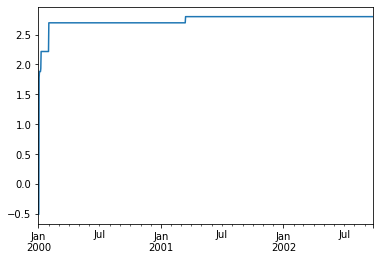

In [53]:
ks.options.plotting.backend = "matplotlib"

kser.plot()

**Gráficos de Pandas Bokeh**

In [54]:
pip install pandas_bokeh

Note: you may need to restart the kernel to use updated packages.


In [55]:
ks.options.plotting.backend = "pandas_bokeh"

kdf.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()

Figure(id='1197', ...)

**Gráfico por defecto con plotly**

In [56]:
kser.plot()

Figure(id='1478', ...)

En un DataFrame, el plot() es una conveniencia para trazar todas las columnas con etiquetas:

In [57]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [58]:
kdf = ks.from_pandas(pdf)

In [59]:
kdf = kdf.cummax()
kdf

,A,B,C,D
2000-01-01,2.835743,-0.423282,0.680552,1.128856
2000-01-02,2.835743,0.347905,0.680552,1.128856
2000-01-03,2.835743,1.360677,0.680552,1.128856
2000-01-04,2.835743,1.360677,0.680552,1.128856
2000-01-05,2.835743,1.360677,0.680552,1.128856
2000-01-06,2.835743,1.360677,0.680552,1.128856
2000-01-07,2.835743,1.360677,0.680552,1.128856
2000-01-08,2.835743,1.360677,0.680552,1.128856
2000-01-09,2.835743,1.360677,0.680552,1.662657
2000-01-10,2.835743,1.360677,0.680552,1.662657


In [60]:
kdf.plot()

Figure(id='1759', ...)

### 6. Entrada / salida de datos


### CSV

CSV es sencillo y fácil de usar

In [61]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

Py4JJavaError: An error occurred while calling o6489.save.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:198)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:159)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:104)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:102)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.doExecute(commands.scala:122)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:80)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:80)
	at org.apache.spark.sql.DataFrameWriter$$anonfun$runCommand$1.apply(DataFrameWriter.scala:676)
	at org.apache.spark.sql.DataFrameWriter$$anonfun$runCommand$1.apply(DataFrameWriter.scala:676)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:676)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:285)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:271)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:229)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 106.0 failed 1 times, most recent failure: Lost task 0.0 in stage 106.0 (TID 811, localhost, executor driver): java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\ilse-\BIG_DATA1\Big_Data1\3. Ejercicios Apache Spark Koala\foo.csv\_temporary\0\_temporary\attempt_20231116211653_0106_m_000000_811\part-00000-65c14f0f-f34f-4241-aa3e-caabf217bc8d-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:770)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:866)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:849)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CSVFileFormat.scala:177)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:85)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:120)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:108)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.org$apache$spark$sql$execution$datasources$FileFormatWriter$$executeTask(FileFormatWriter.scala:236)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:170)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:169)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:167)
	... 32 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\ilse-\BIG_DATA1\Big_Data1\3. Ejercicios Apache Spark Koala\foo.csv\_temporary\0\_temporary\attempt_20231116211653_0106_m_000000_811\part-00000-65c14f0f-f34f-4241-aa3e-caabf217bc8d-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:770)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:866)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:849)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CSVFileFormat.scala:177)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:85)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:120)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:108)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.org$apache$spark$sql$execution$datasources$FileFormatWriter$$executeTask(FileFormatWriter.scala:236)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:170)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:169)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more


### Parquet

Parquet es un formato de archivo eficiente y compacto para leer y escribir más rápido.

In [ ]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

### Spark IO

Además, Koalas es totalmente compatible con las diversas fuentes de datos de Spark, como ORC y una fuente de datos externa.

In [ ]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)